# Testing cropping MRIs

- Test cropping 100x100x100 in center. 
- Compare crop with Nigri's work
- Test with AntsPy or Numpy

In [1]:
import os
import sys
module_path = os.path.abspath('../utils')
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from deepbrain import Extractor
import ants

from skull_stripping_ants.s3 import *

%load_ext autoreload
%autoreload 2


In [125]:
main_dir = '/home/lucasthim1/alzheimer_data/test/002_S_4270/'
output_path = "/home/lucasthim1/alzheimer_data/test/registration_test/01_affine_s3/"
input_path = "/home/lucasthim1/alzheimer_data/test/002_S_4270/MT1__N3m/2011-10-11_07_59_12.0/S125083/ADNI_002_S_4270_MR_MT1__N3m_Br_20111015081648646_S125083_I261073.nii"
atlas_path = '/home/lucasthim1/alzheimer_data/Atlas/atlas_t1.nii'

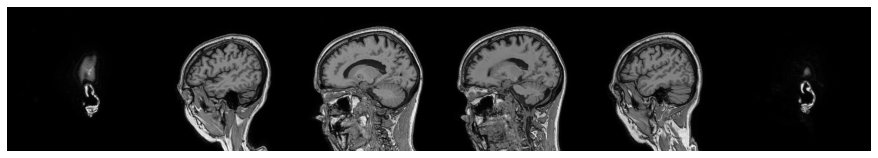

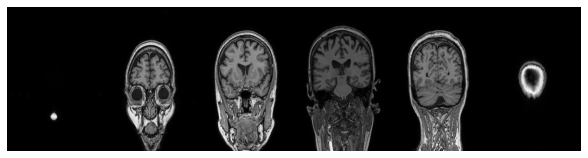

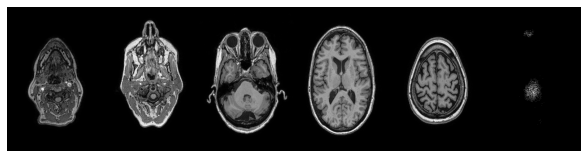

In [122]:
moving = ants.image_read(input_path)
moving.plot(axis =0,figsize=2,nslices=6)
moving.plot(axis =1,figsize=2,nslices=6)
moving.plot(axis =2,figsize=2,nslices=6)


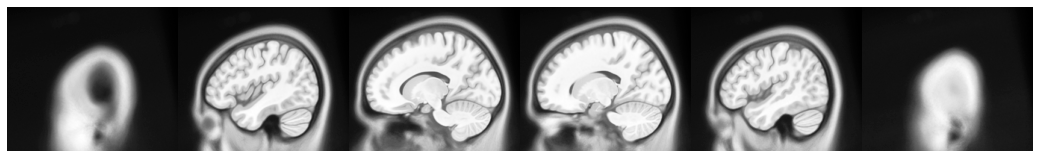

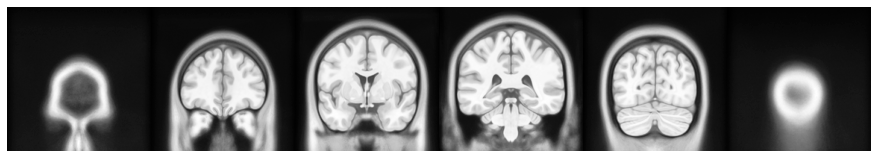

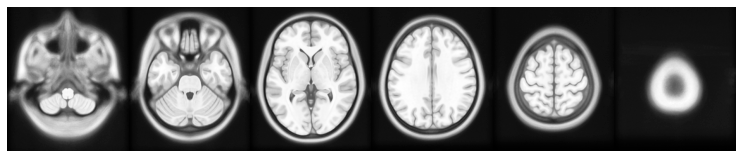

In [126]:
fixed = ants.image_read(atlas_path)
fixed.plot(axis =0,figsize=2,nslices=6)
fixed.plot(axis =1,figsize=2,nslices=6)
fixed.plot(axis =2,figsize=2,nslices=6)

In [127]:
mytx = ants.registration(fixed=fixed , moving=moving, type_of_transform='Affine' ,grad_step=0.1)
warpedimage = ants.apply_transforms(fixed=fixed, moving=moving, transformlist=mytx['fwdtransforms'])

/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [128]:
print("Atlas size:",fixed.shape)
print("Moving Image size:",moving.shape)
print("Registered Image size:",warpedimage.shape)

Atlas size: (193, 229, 193)
Moving Image size: (170, 256, 256)
Registered Image size: (193, 229, 193)


In [130]:
print("Center of images:")

print("Atlas size:",[int(np.ceil(x/2)) for x in fixed.shape])
print("Moving Image size:",[int(np.ceil(x/2)) for x in moving.shape])
print("Registered Image size:",[int(np.ceil(x/2)) for x in warpedimage.shape])

Center of images:
Atlas size: [97, 115, 97]
Moving Image size: [85, 128, 128]
Registered Image size: [97, 115, 97]


In [131]:
center_dim = [int(np.ceil(x/2)) for x in warpedimage.shape]
lower_dim = [int(x - 50) for x in center_dim]
upper_dim = [int(x + 50) for x in center_dim]

In [135]:
cropped_img =  ants.crop_indices(warpedimage,lowerind = lower_dim,upperind = upper_dim)

/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



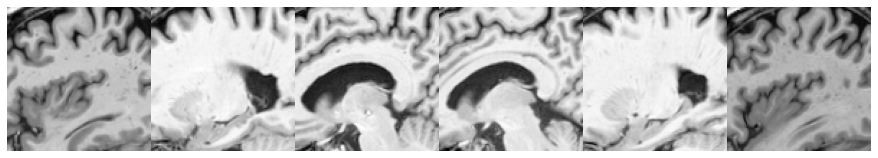

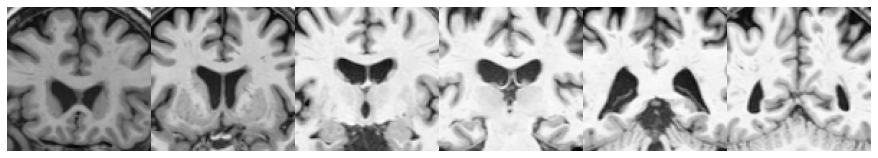

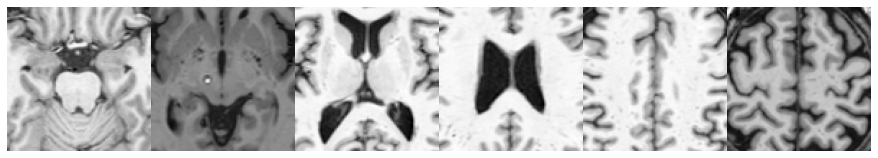

In [134]:
cropped_img.plot(axis =0,figsize=2,nslices=6)
cropped_img.plot(axis =1,figsize=2,nslices=6)
cropped_img.plot(axis =2,figsize=2,nslices=6)

In [136]:
ants.get_center_of_mass(warpedimage)

/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(-0.5171486765998671, 18.120850226321693, 18.03447310103933)

In [139]:
def crop_image(image,bbox_size = 100,center_dim = None):
    if center_dim is None:
        center_dim = [int(np.ceil(x/2)) for x in image.shape]
    lower_dim = [int(x - bbox_size/2) for x in center_dim]
    upper_dim = [int(x + bbox_size/2) for x in center_dim]

    cropped_img =  ants.crop_indices(image,lowerind = lower_dim,upperind = upper_dim)
    return cropped_img

/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



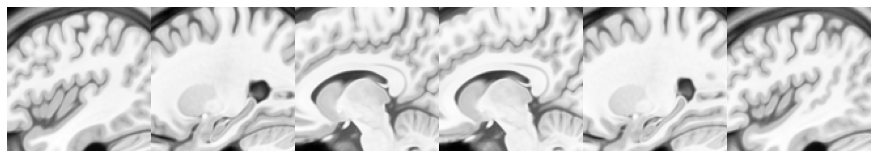

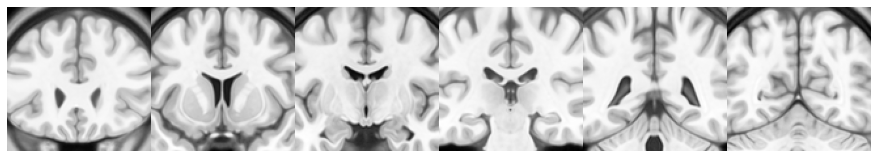

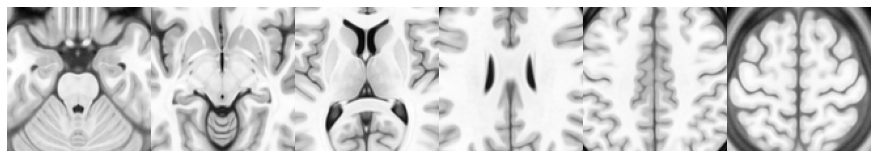

In [144]:
cropped_img = crop_image(fixed,110)
cropped_img.plot(axis =0,figsize=2,nslices=6)
cropped_img.plot(axis =1,figsize=2,nslices=6)
cropped_img.plot(axis =2,figsize=2,nslices=6)

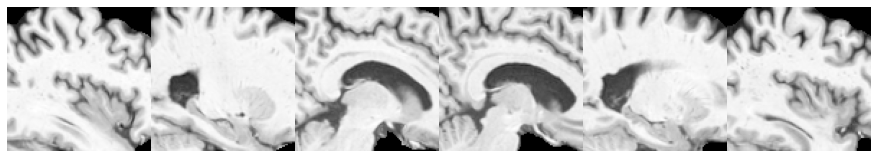

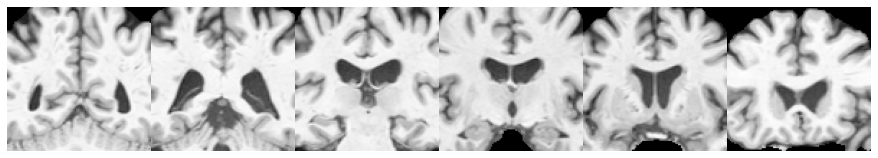

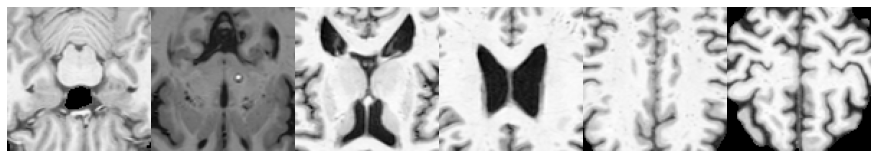

In [5]:
path = "/home/lucasthim1/alzheimer_data/test/002_S_4270_masked_deepbrain.nii.gz"
final_image = ants.image_read(path)
final_image.plot(axis =0,figsize=2,nslices=6)
final_image.plot(axis =1,figsize=2,nslices=6)
final_image.plot(axis =2,figsize=2,nslices=6)
